<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Средние-признаки-и-стандартное-отклонение" data-toc-modified-id="Средние-признаки-и-стандартное-отклонение-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Средние признаки и стандартное отклонение</a></span></li><li><span><a href="#Средние-значения-признаков-оставшихся-и-ушедших-пользователей" data-toc-modified-id="Средние-значения-признаков-оставшихся-и-ушедших-пользователей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Средние значения признаков оставшихся и ушедших пользователей</a></span></li><li><span><a href="#Распределение-ушедших-и-оставшихся-пользователей" data-toc-modified-id="Распределение-ушедших-и-оставшихся-пользователей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Распределение ушедших и оставшихся пользователей</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Матрица корреляций</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомандации" data-toc-modified-id="Выводы-и-рекомандации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомандации</a></span></li></ul></div>

# Прогнозирование вероятности оттока клиентов

Целью проекта является определить признаки клиентов, влияющих на отток и спрогнозировать веротяность оттока клиентов. Для достижения цели необходимо решить следующие задачи:
* изучить общую информацию о предоставленных данных;
* подготовить данные для анализа: выявить и устранить недостатки в данных, привести данные к нужным типам;
* провети разведывательный анализ данных (EDA);
* построить модели прогнозирования оттока клиентов;
* провести кластеризацию клиентов;
* подготовить выводы и предложения.

## Загрузка данных и подготовка их к анализу

Для начала ознакомимся с общей информацией о датасетах: количеством столбцов и строк, наименованием столбцов и типами данных в них, с конкретными данными датасета.   

Импортируем необходимые библиоткеи и модули:

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
import warnings
warnings.filterwarnings('ignore')
from datetime import date, timedelta
sns.set_palette("tab20")
sns.set_style('whitegrid')
from io import BytesIO
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Сохраним анализируемый датафрейм в переменной *df*:

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

Ознакомимся с общей информацией о таблице и данными в ней с помощью метода info(), а также выведем 5 первых строк датасета:

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


Датасет содержит следующие столбцы:
* *gender* — пол;
* *Near_Location* — проживание или работа в районе, где находится фитнес-центр;
* *Partner* — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* *Promo_friends* — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* *Phone* — наличие контактного телефона;
* *Age* — возраст;
* *Lifetime* — время с момента первого обращения в фитнес-центр (в месяцах);
* *Contract_period* — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* *Month_to_end_contract* — срок до окончания текущего действующего абонемента (в месяцах);
* *Group_visits* — факт посещения групповых занятий;
* *Avg_class_frequency_total* — средняя частота посещений в неделю за все время с начала действия абонемента;
* *Avg_class_frequency_current_month* — средняя частота посещений в неделю за предыдущий месяц;
* *Avg_additional_charges_total* — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* *Churn* — факт оттока в текущем месяце.

Приведём наименования столбцов в нижний регистр

In [4]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Оценим также имеются ли дубликаты в датафрейме:

In [5]:
print(f'Количество дубликатов в датасете: {df.duplicated().sum()}')

Количество дубликатов в датасете: 0


### Выводы

Наименования столбцов датафреймов были приведены в нижний регистр. Данные подготовлены для дальнейшей работы.

## Исследовательский анализ данных (EDA)

### Средние признаки и стандартное отклонение

Оценим центральные положения данных (среднее и медиану), а также стандартное отклонение с помощью метода `describe()`: 

In [6]:
a = df.describe().T
a['var'] = a['std'] ** 2
a

,count,mean,std,min,25%,50%,75%,max,var
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00,0.25
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00,0.13
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00,0.25
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00,0.21
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00,0.09
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00,20.70
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00,0.24
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00,10.62
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59,"9,284.40"
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00,17.57


Можно сделать следующие выводы:
* 85% клиентов посещают фитнес-залы вблизи дома;
* почти половина клиентов состоит из сотрудников компаний-партнёров;
* всего 31% начали заниматься с использованием промокода от друга-клиента;
* среднее значение длительности текущего абонимента 4,68 (то есть ближе к 6 месяцам), но медианное значение - 1 месяц;
* 41% клиентов посещает групповые занятия;
* средний и медианный возрасты совпадают - 29 лет;
* медианная сумма выручки от дополнительных услуг фитнес центра - 136;
* с момента первого посещания фитнес-центра у среднего пользователя прошло 3 месяца;
* 27% клиентов в следующем месяце прекращают посещать фитнес-центр.

Поскольку почти половина клиентов - сотрудники компаний-партнёров - посмотрим как эта группа отличается от посетителей, которые не работают в компаниях-партнёрах:

In [7]:
df.groupby('partner').agg(
                          {'contract_period':'mean', 
                           'avg_additional_charges_total':'median',
                           'lifetime':'mean', 
                           'avg_class_frequency_total':'mean',
                           'avg_class_frequency_current_month':'mean',
                           'churn':'mean'}).T

partner,0,1
contract_period,3.32,6.11
avg_additional_charges_total,133.32,141.36
lifetime,3.50,3.96
avg_class_frequency_total,1.86,1.90
avg_class_frequency_current_month,1.72,1.82
churn,0.33,0.19


Как видим, посетители из компаний-партнёров имеют более длительные абонементы и лайфтайм. Такие клиенты также больше тратят на дополнительные услуги. Среднее количество занятий между двумя группами не отличается. Отток клиентов-работников партнёров меньше, чем иных клиентов.

<div class="alert alert-success">
<b>👍 Успех:</b> Отличный портрет среднего клиента. Здорово, что обратил внимание на сотрудников компаний партнеров.
</div>

### Средние значения признаков оставшихся и ушедших пользователей 

Определим есть ли отличия в признаках у ушедших и оставшихся пользователей:

In [8]:
df.groupby('churn').agg({'mean', 'median'}).T

churn                                         0      1
gender                            median   1.00   1.00
                                  mean     0.51   0.51
near_location                     median   1.00   1.00
                                  mean     0.87   0.77
partner                           median   1.00   0.00
                                  mean     0.53   0.36
promo_friends                     median   0.00   0.00
                                  mean     0.35   0.18
phone                             median   1.00   1.00
                                  mean     0.90   0.90
contract_period                   median   6.00   1.00
                                  mean     5.75   1.73
group_visits                      median   0.00   0.00
                                  mean     0.46   0.27
age                               median  30.00  27.00
                                  mean    29.98  26.99
avg_additional_charges_total      median 149.88 103.81
                                  mean   158.45 115.08
month_to_end_contract             median   6.00   1.00
                                  mean     5.28   1.66
lifetime                          median   4.00   1.00
                                  mean     4.71   0.99
avg_class_frequency_total         median   2.04   1.49
                                  mean     2.02   1.47
avg_class_frequency_current_month median   2.05   0.98
                                  mean     2.03   1.04

Можно сделать следующие выводы:
* в 77% случаев уходят посетители, проживающие рядом с центром;
* возраст оттока и оставшихся одинаковый: 27-30 лет;
* ушедшие пользователи реже посещают групповые занятия, в меньшем количестве случаев являются сотрудниками компаний-партнёров либо пришедщими по акции "приведи друга";
* чаще всего уходят посетители с абонементом в 1 месяц и после 1 месяца с момента первого посещения;
* посетители в оттоке в среднем меньшее количество раз занимались в течение недели; 
* оставшиеся пользователи больше тратят на дополнительные услуги фитнесс-центров;

### Распределение ушедших и оставшихся пользователей

Построим столбчатые гистограммы признаков в разрезе оставшихся и ушедших пользователей:

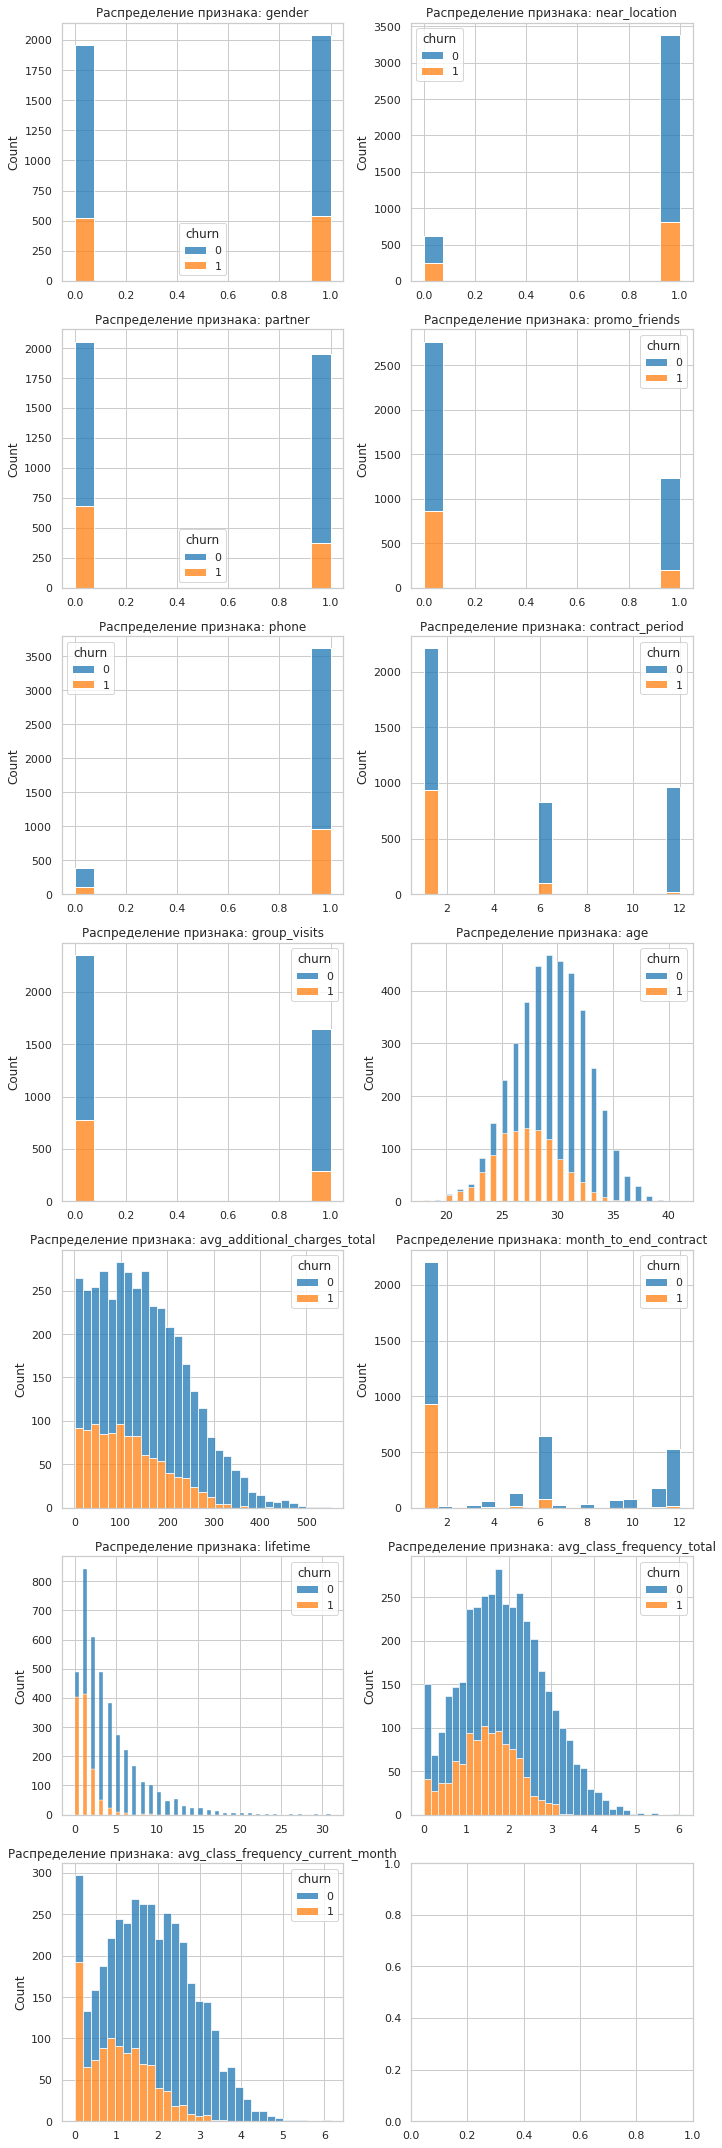

In [9]:
fig, axes = plt.subplots(7, 2, figsize=(10, 30), sharex=False, sharey=False)
axes = axes.ravel()
d = df.columns[:-1]

for col, ax in zip(d, axes):
    sns.histplot(data=df, x=col, hue='churn', ax=ax, palette='tab10', multiple='stack')
    ax.set(title=f'Распределение признака: {col}', xlabel=None)
    
fig.tight_layout()
plt.show()

* посетители в оттоке реже являются работниками компаний-партнёров и используют промокод по акции "приведи друга";
* оставшиеся пользователи чаще занимаются в группах, чем ушедшие;
* клиенты, ушедшие в отток, имеют, как правило, абонементы на котороткий период и, как следствие, меньшее количество месяцев до окончания абонемента, чем оставшиеся пользователи;
* ушедшие посетители имеют меньший лайфтайм, а также среднее количество занятий в неделю.

### Матрица корреляций

Рассчитаем корреляцию между признаками и построим матрицу с помощью `heatmap`:

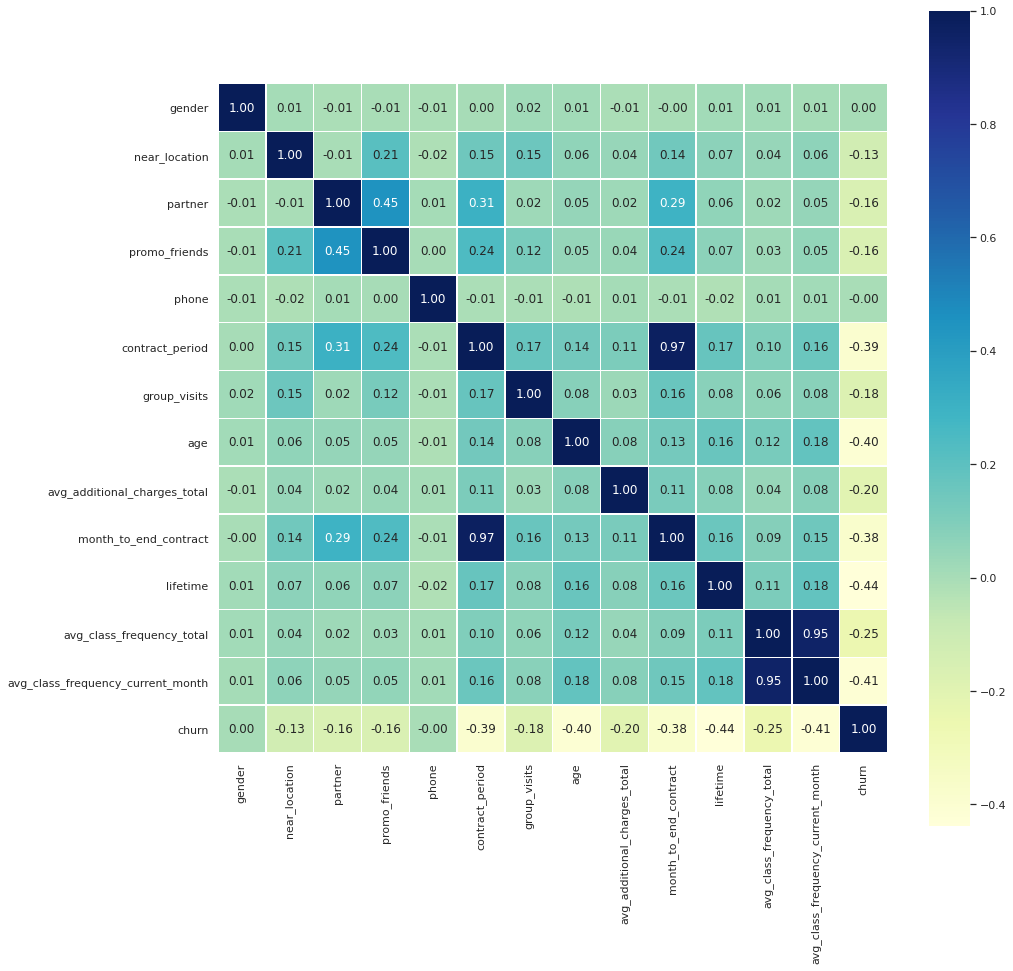

In [10]:
cm = df.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize = (15, 15))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True, fmt='.2f', cmap="YlGnBu", linewidths=.5)
ax.set_ylim(14, 0)
plt.show()


Как видим, сильная корреляция имеется между следующими признаками:
* срок абонемента (*contract_period*) и количество месяцев до его окончания (*month_to_end_contract*);
* средняя частота посещений в неделю за все время с начала действия абонемента (*avg_class_frequency_total*) и средняя частота посещений в неделю за предыдущий месяц (*avg_class_frequency_current_month*)

Для исключения мультиколлинеарности исключим из датасета столбцы *contract_period* и *avg_class_frequency_total*:

In [11]:
df = df.drop(['contract_period', 'avg_class_frequency_total'], axis=1)

### Выводы

Удалось выявить предварительные признаки, которым отвечают клиенты в оттоке: они, как правило, не являются сотрудниками компаний-партнёров, не используют промокоды от друзей, не занимаются в группах и имеют менее продолжительные абонементы.

## Модели прогнозирования оттока клиентов

Создадим функцию *print_all_metrics* для вывода метрик accuracy, precision, recall:

In [12]:
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Построим модели логистической регресии и случайным лесом:

In [13]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st=scaler.transform(X_train)
X_test_st=scaler.transform(X_test)

# алгоритм для модели логистической регресии
lr_model = LogisticRegression(random_state=0, solver='liblinear')
 
# обучим модель
lr_model.fit(X_train_st, y_train)
 
# сделаем прогнозы и выведем метрики
lr_predictions = lr_model.predict(X_test_st)
print_all_metrics(
                  y_test,
                  lr_predictions,
                  title='Метрики для модели логистической регресии',
)

# модель случайного леса
rf_model = RandomForestClassifier(random_state = 0)
 
# обучение модели
rf_model.fit(X_train_st, y_train)
 
# вычисление прогноза
rf_predictions = rf_model.predict(X_test_st)
 
# вывод метрик
print_all_metrics(
    y_test,
    rf_predictions,
    title='Метрики для модели случайного леса:',
)

Метрики для модели логистической регресии
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.78


Несмотря на то, что метрики обоих моделей практически идентичны, будем считать что модель случайным лесом показала лучший результат, т.к. точность (accuracy) является незначительно, но больше, чем у логистической регрессии.

## Кластеризация клиентов

Стандартизируем данные:

In [14]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

Выведем дендрограмму:

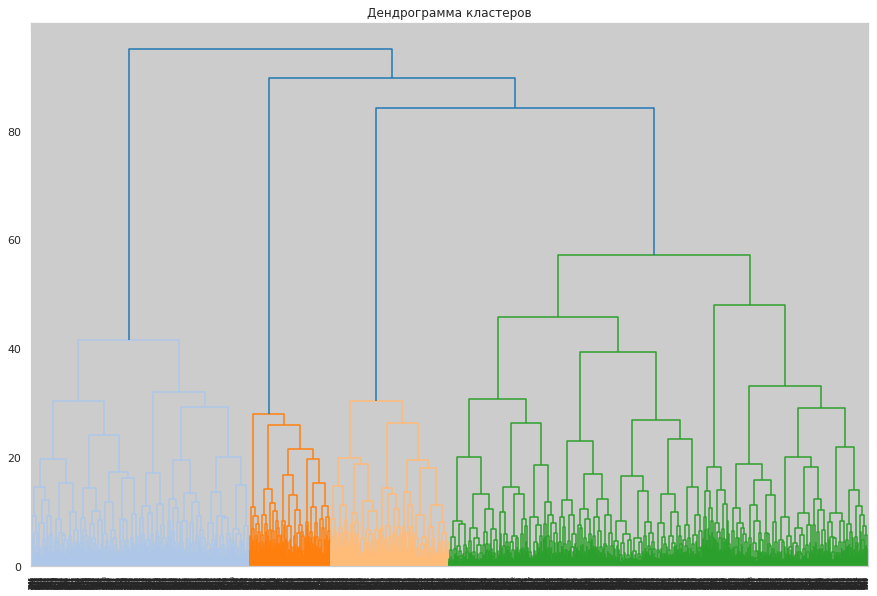

In [15]:
linked = linkage(x_sc, method = 'ward')

# выведем диаграмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', color_threshold=None)
plt.title('Дендрограмма кластеров')
plt.show()

Предположим, что можно выделить 4 кластера.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [16]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)
df['cluster'] = labels

Посмотрим на средние показатели признаков в разрезе спрогнозированных кластеров:

In [17]:
df.groupby('cluster').agg({'median', 'mean'}).T

cluster                                       0      1      2      3      4
gender                            mean     0.52   0.54   0.50   0.49   0.50
                                  median   1.00   1.00   0.00   0.00   0.50
near_location                     mean     0.86   1.00   1.00   1.00   0.00
                                  median   1.00   1.00   1.00   1.00   0.00
partner                           mean     0.47   0.38   0.89   0.22   0.49
                                  median   0.00   0.00   1.00   0.00   0.00
promo_friends                     mean     0.31   0.01   1.00   0.07   0.08
                                  median   0.00   0.00   1.00   0.00   0.00
phone                             mean     0.00   1.00   1.00   1.00   1.00
                                  median   0.00   1.00   1.00   1.00   1.00
group_visits                      mean     0.43   0.53   0.52   0.29   0.23
                                  median   0.00   1.00   1.00   0.00   0.00
age                               mean    29.30  30.68  29.60  27.57  28.68
                                  median  29.00  31.00  30.00  28.00  29.00
avg_additional_charges_total      mean   144.21 178.29 153.58 116.54 137.13
                                  median 137.02 170.88 148.24 103.06 124.21
month_to_end_contract             mean     4.47   5.57   6.32   1.99   2.82
                                  median   1.00   6.00   6.00   1.00   1.00
lifetime                          mean     3.94   5.40   4.28   1.90   2.97
                                  median   3.00   4.00   3.00   1.00   2.00
avg_class_frequency_current_month mean     1.72   2.33   1.92   1.18   1.60
                                  median   1.66   2.38   1.90   1.11   1.50
churn                             mean     0.27   0.02   0.12   0.57   0.40
                                  median   0.00   0.00   0.00   1.00   0.00

Максимальный отток зафиксирован в кластерах 3 и 4 - практически половина (в случае с 3 кластером даже почти 60%) посетителей этих кластеров прекратит посещать фитенс-зал в следующем месяце.
Построим гпафики и оценим признаки в разбивке кластеров:

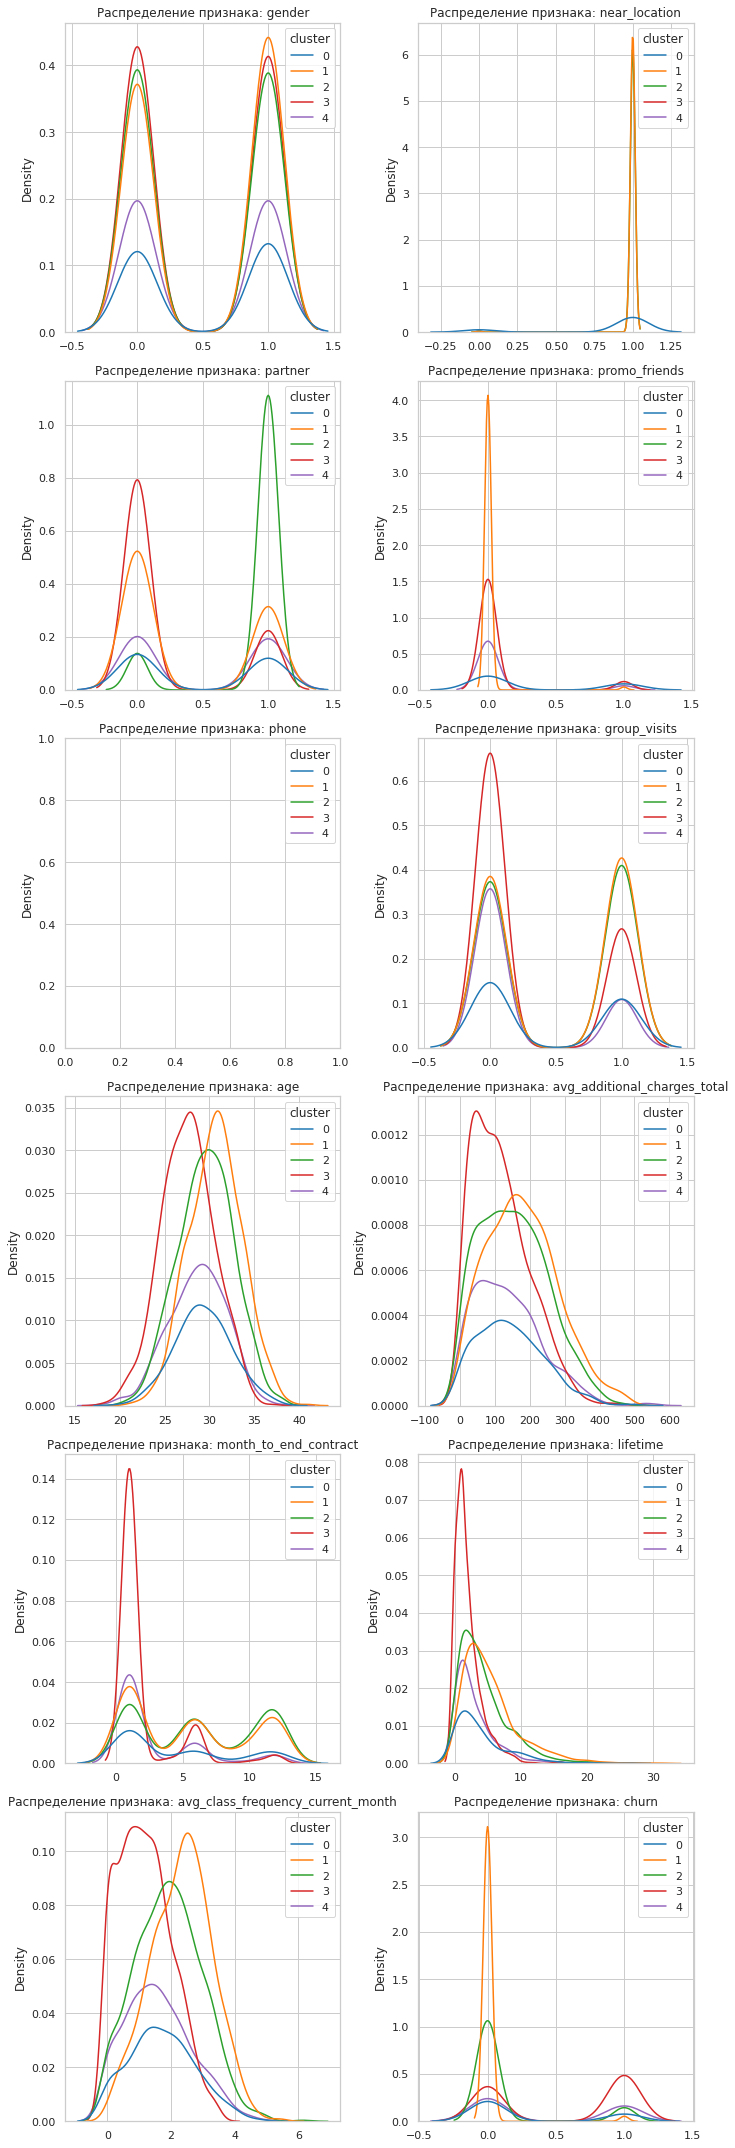

In [18]:
fig, axes = plt.subplots(6, 2, figsize=(10, 30), sharex=False, sharey=False)
axes = axes.ravel()
d = df.columns[:-1]

for col, ax in zip(d, axes):
    sns.kdeplot(data=df, x=col, hue='cluster', ax=ax, palette='tab10')
    ax.set(title=f'Распределение признака: {col}', xlabel=None)
    
fig.tight_layout()
plt.show()

Оценив признаки в разрезе кластеров можно отметить:
* пользователи каждого кластера пользуются фитнес залами рядом с домом;
* в кластере с самым большим оттоком большинство посетителей не являются сотрудниками компаний-партнеров и, напротив, в кластере с минимальным оттоком большинство пользователей работают в компаниях-партнёрах;
* в кластерах с максимальным оттоком реже чем в остальных начинают занимаются с применением "дружеского промокода";
* кластеры с минимальным оттоком больше тратят на дополнительные услуги
* кластеры, пользователи из которых меньше прекращают заниматься, проводят большее число тренировок в неделю и имеют более долгосрочные абонементы.

## Выводы и рекомандации

По результатам исследования можно сделать следующие выводы и рекомендации по снижению оттока посетителей:
* мотивировать пользователей покупать более длительные абонементы и досрочно продлевать их, поскольку пользователи с бОльшим количеством месяцев до окончания абонементы реже подвержены оттоку;
* расширение сети компаний-партнёров и увелечения доли пользователей-работников таких компаний может сократить отток пользователей, а также увеличить выручку с дополнительных услуг, т.к. такие посетители чаще их потребляют;
* стимулировать посещение групповых занятий.